### Import libary

In [1]:
import sys
import os
import cv2
import numpy as np
import copy
import random
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import keras
import tensorflow as tf
from keras import layers
from keras import optimizers
from keras import regularizers
from keras import backend as K
from keras.optimizers import adam 

from keras.models import Sequential
from keras.models import Model, load_model

import seaborn as sns 

from keras import models
from keras import optimizers
from keras import callbacks
from keras import losses
from keras import regularizers
from keras.layers import Dense, Dropout, Flatten 
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D,GlobalAveragePooling2D, Convolution2D
from keras.layers import Activation, Dense
from keras import optimizers 


from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot

# from tensorflow.keras.models import BatchNormalization
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Flatten, Input
from keras.layers import Convolution2D, MaxPooling2D,ZeroPadding2D
from keras.optimizers import SGD
from keras.layers  import BatchNormalization
from sklearn.decomposition import PCA
from tensorflow.keras.optimizers import SGD
import math
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import LearningRateScheduler
from keras.regularizers import Regularizer

# albumentations libary

from albumentations import (
    HorizontalFlip, IAAPerspective, ShiftScaleRotate, CLAHE, RandomRotate90,
    Transpose, ShiftScaleRotate, Blur, OpticalDistortion, GridDistortion, HueSaturationValue,
    IAAAdditiveGaussianNoise, GaussNoise, MotionBlur, MedianBlur, RandomBrightnessContrast, IAAPiecewiseAffine,
    IAASharpen, IAAEmboss, Flip, OneOf, Compose
)


Using TensorFlow backend.
/home/manhduy/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/manhduy/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/manhduy/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/manhduy/.local/lib/python3.6/site-packages/tensorflow/py

### Read file path 

In [2]:
root_folder = '/home/manhduy/Documents/model_DL/Project_Intern/Data/classify_flower_not'

In [3]:
file_path_train_data  = os.path.join(root_folder,'train')
file_path_test_data = os.path.join(root_folder,'test')


In [4]:
def wfile(root): 
    fp = []
    for path, subdirs, file in os.walk(root): 
        for name in file: 
            fp.append(os.path.join(path,name))
    return sorted(fp)

In [5]:
train = wfile(file_path_train_data)
test  = wfile(file_path_test_data)

In [59]:
train

['/home/manhduy/Documents/model_DL/Project_Intern/Data/classify_flower_not/train/0/1400952372887.jpeg',
 '/home/manhduy/Documents/model_DL/Project_Intern/Data/classify_flower_not/train/0/2904415371_c259277f6b.jpg',
 '/home/manhduy/Documents/model_DL/Project_Intern/Data/classify_flower_not/train/0/2904700609_1ae16e7f84.jpg',
 '/home/manhduy/Documents/model_DL/Project_Intern/Data/classify_flower_not/train/0/2937781160_91a96afa10.jpg',
 '/home/manhduy/Documents/model_DL/Project_Intern/Data/classify_flower_not/train/0/2941556553_2ace04bd6a.jpg',
 '/home/manhduy/Documents/model_DL/Project_Intern/Data/classify_flower_not/train/0/2943813441_dbe81a8e8d.jpg',
 '/home/manhduy/Documents/model_DL/Project_Intern/Data/classify_flower_not/train/0/2951149005_18d9bd6a8e.jpg',
 '/home/manhduy/Documents/model_DL/Project_Intern/Data/classify_flower_not/train/0/2969081609_56992c45cf.jpg',
 '/home/manhduy/Documents/model_DL/Project_Intern/Data/classify_flower_not/train/0/2969083891_6ce86c05e3.jpg',
 '/home/

In [6]:
train_labels = []
labels_test = []
for path in train: 
    train_labels.append(int(path.split("/")[-2]))
for path in test: 
    labels_test.append(int(path.split("/")[-2]))

In [7]:
len(train),len(train_labels),len(test),len(labels_test)

(9481, 9481, 1180, 1180)

In [8]:
import cv2
from sklearn.model_selection import train_test_split

In [9]:
train_x, valid_x, train_y, valid_y = train_test_split(train,train_labels, shuffle = True, test_size=0.2)

In [10]:
len(train_x),len(train_y),len(valid_x),len(valid_y)

(7584, 7584, 1897, 1897)

### Image Datagenerator Keras

In [11]:
# input_shape_flower = (224,224,3)
# batch_size = 8 
# epochs = 15
# n_classes = 1
# n_channels = 3
# train_size  = len(train_root)
# valid_size  = len(test_x)-1
# input_shape = (224,224)
# print(train_size,valid_size)

In [12]:
# train_datagen = ImageDataGenerator( rotation_range=15,
#                                    width_shift_range = 0.2, 
#                                    height_shift_range = 0.2,
#                                    rescale = 1. /255, 
#                                    shear_range = 0.2, 
#                                    zoom_range = 0.2, 
#                                    horizontal_flip = 0.1)


# train_generator_keras = train_datagen.flow_from_directory(file_path_train_data, 
#                                                      target_size = input_shape,
#                                                      batch_size = batch_size,  
#                                                      color_mode = 'rgb',
#                                                     class_mode = 'categorical')

# validation_datagen = ImageDataGenerator(rescale = 1./255)
# validation_generator_keras = validation_datagen.flow_from_directory(file_path_test_data, 
#                                                      target_size = input_shape,
#                                                       color_mode = 'rgb', 
#                                                       class_mode = 'categorical',
#                                                       batch_size = batch_size) 
# x,y = train_generator[0]

# print(x.shape,y.shape,type(x),type(y)) # train_generator return tubple 2 numpy array x va y 

# plt.imshow(x[5])
# index = np.argmax(y[0])
# print ( "y la mot label (batch_size,n_classes) voi index la label ung voi image y[0] trong batch_size co lable la: {}".format (str(index)) )

### Data Generator 

In [13]:
class ClassifyFlowerGenerator (keras.utils.Sequence): 
    def __init__(self, 
                 list_id, 
                 labels, 
                 batch_size = 8, 
                 input_shape = (224,224),
                 n_channels = 3, 
                 n_classes = 1, 
                 shuffle = True): 
        
        'Initialization'
        self.list_id    = list_id
        self.input_shape = input_shape
        self.batch_size = batch_size
        self.labels     = labels
        self.n_channels = n_channels
        self.n_classes  = n_classes 
        self.shuffle    = shuffle
        self.ids = range(len(self.list_id))
        self.on_epoch_end()
        
        assert len(self.list_id) == len(self.labels)
        
        print(" >> batch_size : {} images".format(self.batch_size))
        
        
        
    def __len__ (self): 
        return int(np.floor(len(self.list_id) / self.batch_size))
    
    def __getitem__(self, index): 
        
        indexes = self.indexes[index * self.batch_size : (index + 1)* self.batch_size]
        list_id_temp = [self.ids[k]  for k in indexes]
        
        x , y = self.__data_generation (list_id_temp) 
        
        return x, y
    
    def on_epoch_end(self): 
        ' updata indexes after each epoch'
        self.indexes = np.arange(len(self.ids)) 
        
        if self.shuffle == True: 
            np.random.shuffle(self.indexes)
            
    def __data_generation(self, ids): 
        x = np.empty ((0,*self.input_shape, self.n_channels),dtype=np.float32 )
        y = []
        for index ,id in enumerate(ids):
        
            fps = self.list_id[id]
            labels = self.labels[id]
#             try: 
            img = cv2.imread(fps)[:,:,::-1]
#             except TypeError: 
#                 return None 
            image = cv2.resize(img,(self.input_shape))
            image = image/ 255
            image = image.astype(np.float32)
#             plt.imshow(image)
#             plt.show()
            image = np.expand_dims(image,axis = 0)
            x = np.vstack((x,image))
#             y[i] = self.labels[index]
            y.append(labels)
#             y[i] = self.labels[id]
        return x , y 
    

In [14]:
batch_size = 8
input_shape = (224,224)
input_shape_model = (224,224,3)
n_channels = 3
n_classes = 1 
params = {'input_shape': input_shape,
            'batch_size': batch_size, 
            'n_channels': n_channels, 
            'n_classes': n_classes,
            'shuffle': True}

In [15]:
trainning_data = ClassifyFlowerGenerator(train_x,train_y ,**params)

 >> batch_size : 8 images


In [16]:
validation_data = ClassifyFlowerGenerator(valid_x, valid_y, **params) 
a , b = validation_data[0]

 >> batch_size : 8 images


In [60]:
x , y = validation_data[0]

In [63]:
y

[1, 0, 1, 0, 0, 0, 1, 1]

### Plot training data generator with one bach_size

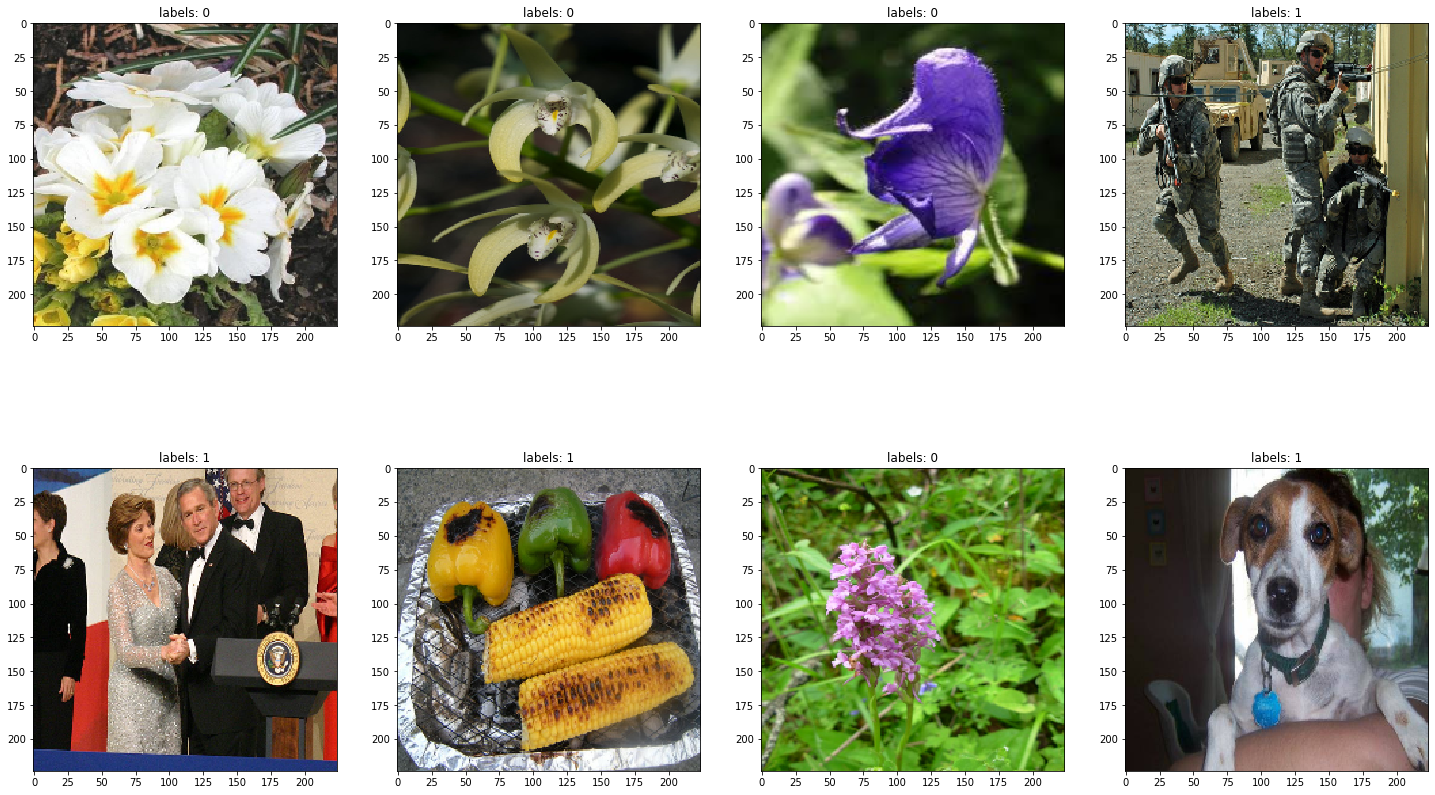

In [17]:
x , y = trainning_data[0]

plt.figure(figsize=(25,15))
for i in range(batch_size): 
    plt.subplot(2,4, i + 1)
    image = x[i]
    plt.title("labels: {}".format(y[i]))
    plt.imshow(image)

### Plot validation Data Generator with one batch_size

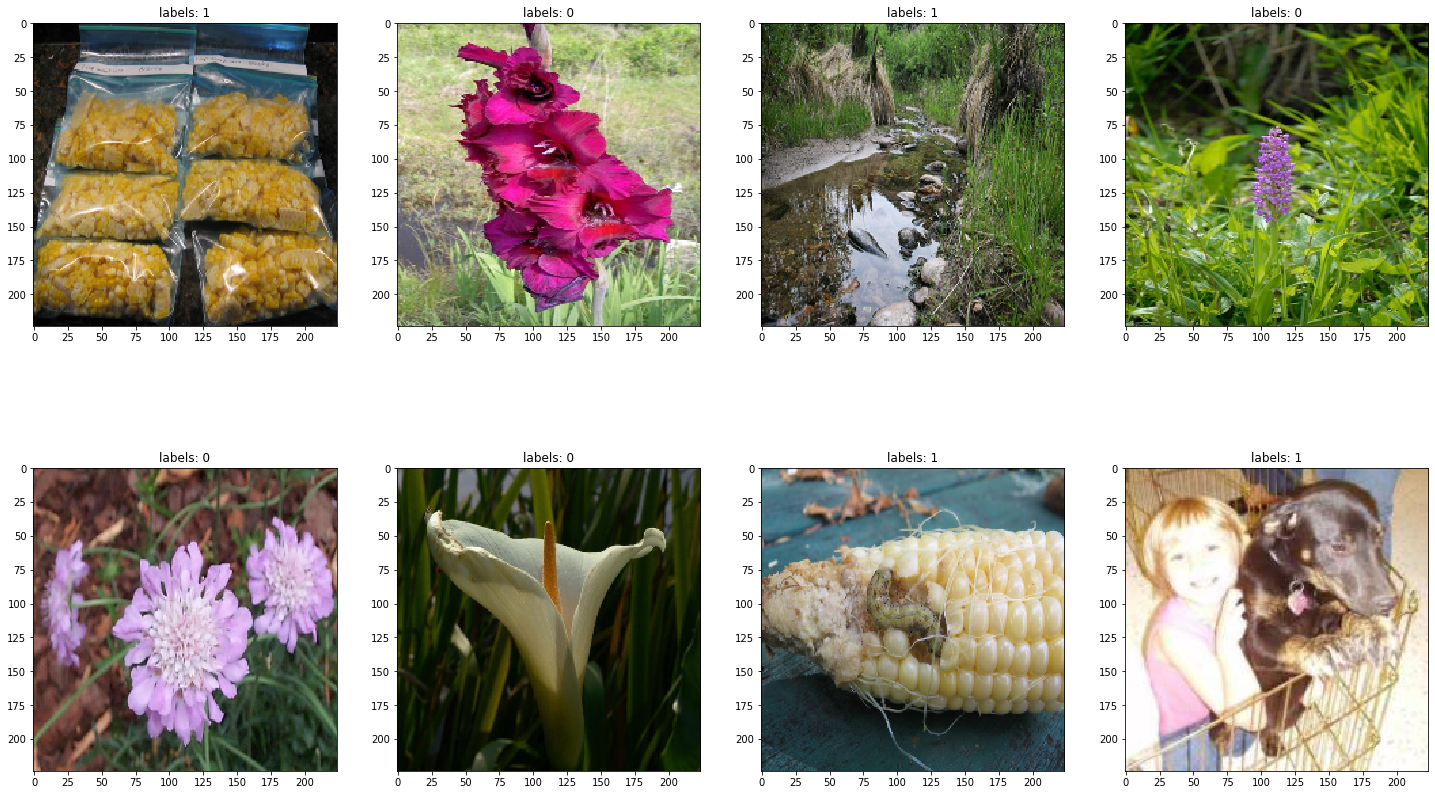

In [18]:
a , b = validation_data[0]
plt.figure(figsize=(25,15))
for i in range(batch_size): 
    plt.subplot(2,4, i + 1)
    image = a[i]
    plt.title("labels: {}".format(b[i]))
    plt.imshow(image)
    

##  Train and plot History models 

In [19]:
model = Sequential()


model.add(Conv2D (16, (3,3), activation='relu', padding= 'same', input_shape = input_shape_model))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(32,(3,3), activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))



model.add(Conv2D(64,(3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(128,(3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(256,(3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(256))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))


In [20]:
# model.summary()

In [21]:
path_save = '/home/manhduy/Documents/model_DL/Project_Intern/weights/flower_or_not_flower.h5'

In [22]:
save_best = keras.callbacks.ModelCheckpoint(path_save, monitor='accuracy', verbose=1, save_best_only=True)
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1)

In [23]:
from keras import metrics

print( " == Compiling Model ==")

sgd = optimizers.SGD(lr = 0.001, decay = 1e-6, momentum = 0.9, nesterov= True)
# adam = optimizers.adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)

model.compile(optimizer = sgd, 
                loss = 'binary_crossentropy',
                metrics=['accuracy'])

reduce_lr = ReduceLROnPlateau(monitor='accuracy',
                              factor=0.1,
                              patience = 3, 
                              min_lr=0.000001)

callbacks = [reduce_lr, early_stop, reduce_lr]

 == Compiling Model ==
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [24]:
# history = model.fit_generator( generator = trainning_data,
#                                 steps_per_epoch  = len(trainning_data),
#                                 validation_steps = len(validation_data), 
#                                 validation_data  = validation_data,
#                                 epochs= 10, 
#                                 verbose = 1,
#                                 callbacks=callbacks, 
#                                 shuffle=True)

In [25]:
# H.history.keys()

In [26]:
# def train_model_show(_history):
#     ## plot some result
#     fig, (ax1, ax2, ax3 ) = plt.subplots(3, 1, figsize = (25, 20))
#     # plot train and val loss
#     ax1.plot(history.history['loss'], label = 'Train_loss')
#     ax1.plot(history.history['val_loss'], label = 'Val_loss')
#     ax1.set_title('Train_loss and Val_loss')
#     ax1.set_ylabel('loss')
#     ax1.set_label('epochs')
#     ax1.legend()

#     # plot train and val accuracy
#     ax2.plot(history.history['accuracy'], label = 'train accuracy')
#     ax2.plot(history.history['val_accuracy'], label = 'val_accuracy')
#     ax2.set_title('train accuracy and validation accuracy')
#     ax2.set_ylabel('acc')
#     ax2.set_label('epochs')
#     ax2.legend()
#     plt.show()
    


### Loads models

In [27]:
model = Sequential()


model.add(Conv2D (32, (3,3), activation='relu', padding= 'same', input_shape = (224,224,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(64,(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(64,(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(128,(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))


In [28]:
# model.save_weight('/home/manhduy/Downloads/classify_flower.h5')
model.load_weights('/home/manhduy/Documents/model_DL/Project_Intern/weights/classify_flower.h5')

In [29]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 112, 112, 32)      9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 56, 56, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 28, 28, 64)       

###  predict models 

In [76]:
input_shape = (224,224)
def Preprocessing_Image(img_fps_path):
#     try:
    img = cv2.imread(img_fps_path)[:,:,::-1]
#     except TypeError: 
#         return None
    img = cv2.resize(img,(224,224))
    img = img.astype(np.float32)
    img = img / 255
    img = np.expand_dims(img, axis=0)  
    return img 

In [77]:
path_test_image = '/home/manhduy/Documents/model_DL/Project_Intern/Data/classify_flower_not/test'
test_image = wfile(path_test_image)
len(test_image)

1180

In [78]:
image_test_predict = test_image[250]
img = Preprocessing_Image(image_test_predict)
information = model.predict(img)

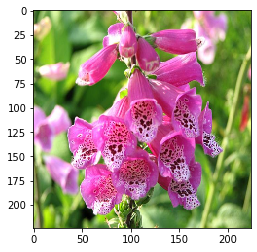

In [79]:
plt.imshow(img[0])

### caculate threshold of models predict 

In [34]:
valid =  np.linspace (0.05 , 1, num = 20)
valid 

array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
       0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

In [35]:
from sklearn.metrics import accuracy_score

In [40]:
accuracy = []
y_true = labels_test
for value_threshold in valid: 
    y_predict = []
    for image in test: 
        img = Preprocessing_Image(image)
        img_predict = model.predict(img)
        lb = img_predict[0][0]
        if img_predict > value_threshold: 
            x = 1
        else: 
            x = 0 
        y_predict.append(x)
    accuracy_curr = accuracy_score(y_true, y_predict)
    accuracy.append(accuracy_curr)
    print(  "threshold curr {} ====> accuracy curr {} ".format(value_threshold,accuracy_curr))

threshold curr 0.05 ====> accuracy curr 0.9169491525423729 
threshold curr 0.1 ====> accuracy curr 0.9203389830508475 
threshold curr 0.15 ====> accuracy curr 0.9194915254237288 
threshold curr 0.2 ====> accuracy curr 0.9211864406779661 
threshold curr 0.25 ====> accuracy curr 0.9194915254237288 
threshold curr 0.3 ====> accuracy curr 0.9228813559322034 
threshold curr 0.35 ====> accuracy curr 0.9194915254237288 
threshold curr 0.39999999999999997 ====> accuracy curr 0.9169491525423729 
threshold curr 0.44999999999999996 ====> accuracy curr 0.9161016949152543 
threshold curr 0.49999999999999994 ====> accuracy curr 0.9161016949152543 
threshold curr 0.5499999999999999 ====> accuracy curr 0.9135593220338983 
threshold curr 0.6 ====> accuracy curr 0.911864406779661 
threshold curr 0.65 ====> accuracy curr 0.9084745762711864 
threshold curr 0.7 ====> accuracy curr 0.9076271186440678 
threshold curr 0.75 ====> accuracy curr 0.9050847457627119 
threshold curr 0.7999999999999999 ====> accurac

In [44]:
print(" chon threshold: {} voi max accuracy: {} ".format(valid[np.argmax(accuracy)],max(accuracy)))

 chon threshold: 0.3 voi max accuracy: 0.9228813559322034 


In [45]:
result_threshold = 0.3

### Predict image 

In [56]:
root = '/home/manhduy/Documents/model_DL/Project_Intern/test_image/'
test_image = wfile(root)
len(test_image)

38

In [57]:
def Predict_image(path_image):
    img = Preprocessing_Image(path_image)
    value = model.predict(img)
    return value > result_threshold

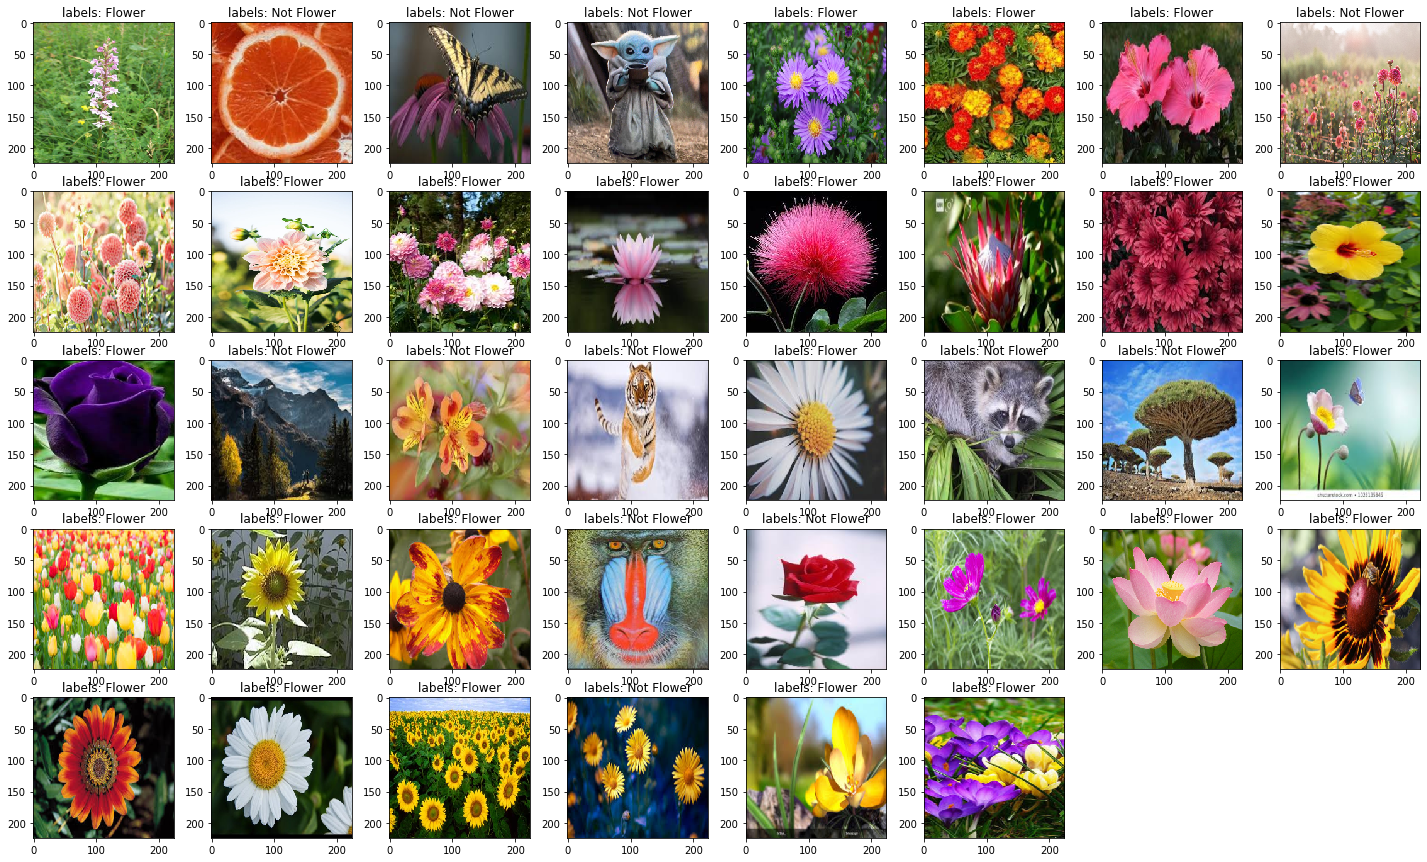

In [58]:
plt.figure(figsize=(25,15))
for index, path in enumerate(test_image): 
    plt.subplot(5,8, index + 1)
    image = Preprocessing_Image(path)[0]
    if Predict_image(path): 
        ans = "Not Flower"
    else: 
        ans = 'Flower'
        
    plt.title("labels: {}".format(ans))
    plt.imshow(image)